<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/Optimizers_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> The purpose of this notebook is understand optimization algorithms by building them from scratch</h2>

<b> Optimizers to implement </b>
1.   Momentum based gradient descent
2.   Nestarov Accelerated gradient descent
3.   Adagrad
4.   RMSProp
5.   Adam

<b> Similarly, the weights will be updated in two ways:</b>
1.   Mini-batch GD
2.   Stochastic GD




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,preprocessing,model_selection, metrics
import warnings
from tqdm import tqdm_notebook

In [2]:
warnings.filterwarnings('ignore')

In [43]:
np.random.seed(0)

In [49]:
# For linear data
X_sg = np.array([[1,2,3,4,5],[-1,-2,-3,-4,-5],[0,0.2,0.4,0.6,1],[1,3,5,7,9],[2,3,4,5,6],[2,1,3,4,2],[-3,0,1,4,2],[1,0,4,1,5],[0,0,1,5,3]])
Y_sg = np.array([0.2,0.4,0.65,0.81,0.99,0.71,0.8,0.84,0.40])

In [45]:
class Sigmoid_Neuron_Updated:
    def __init__(self,X,loss_function,optimizer='Adam',update_method='mini_batch_GD'):
        self.weights = np.random.randn(X.shape[1])
        self.v_w, self.v_b = np.zeros(X.shape[1]), np.zeros(X.shape[1])
        self.bias = np.random.randn()
        self.loss_function = loss_function
        self.optimizer = optimizer

        match update_method:
            case "batch_GD":
                self.size_of_batch = X.shape(0)
            case "mini_batch_GD":
                self.size_of_batch = 2
            case "stochastic_GD":
                self.size_of_batch = 1

        self.update_method = update_method
        print('Initialization has been completed.')

    def fit(self,X,Y,lr,epochs):
        match self.optimizer:
            case "GD":
                print('Invoking gradient descent flow.')
                self.gradient_descent(X,Y,lr,epochs)

            case 'Momentum_GD':
                print('Invoking momentum gradient descent flow.')
                self.momentum_gradient_descent(X,Y,lr,epochs)

            case 'NAG':
                print('Invoking Nestarov Accelerated gradient descent flow.')
                self.momentum_gradient_descent(X,Y,lr,epochs)

    def sigmoid_operation(self,x):
        return 1.0/(1.0+np.exp(-1*(np.dot(x,self.weights.T)+self.bias)))

    def grad_w(self,x,y,y_pred):
        return (y_pred-y)*(y_pred*x*(1-y_pred)) if self.loss_function == 'MSE' else x*(y-y_pred)

    def grad_b(self,y,y_pred):
        return (y_pred-y)*(y_pred*(1-y_pred)) if self.loss_function == 'MSE' else (y-y_pred)

    def plot_loss_vs_epoch(self,loss:dict):
        print(f'Plotting Loss vs Epoch for {self.optimizer}')
        plt.figure(figsize=(15,6))
        plt.scatter(loss.keys(),loss.values())
        plt.plot(loss.keys(),loss.values())
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss vs Epoch for {self.optimizer}')

    def gradient_descent(self,X,Y,lr,epochs):
        print('Starting Gradient Descent execution')
        loss_dict = dict()
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_operation(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss +=  (y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.weights -= lr*dw
                    self.bias -= lr*db
                    dw,db = 0,0

            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

    def momentum_gradient_descent(self,X,Y,lr,epochs):
        loss_dict = dict()
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_operation(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss += (y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.weights -= lr*dw
                    self.bias -= lr*db
                    dw, db = 0,0
            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

    def momentum_gradient_descent(self,X,Y,lr,epochs):
        loss_dict = dict()
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_operation(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss += (y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.weights -= lr*dw
                    self.bias -= lr*db
                    dw, db = 0,0
            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

In [46]:
loss = 'MSE'
optimizer = 'GD'

In [60]:
model = Sigmoid_Neuron_Updated(X_sg,loss,optimizer)

Initialization has been completed.


Invoking gradient descent flow.
Starting Gradient Descent execution


Epochs:   0%|          | 0/1000 [00:00<?, ?Epoch/s]

Plotting Loss vs Epoch for GD


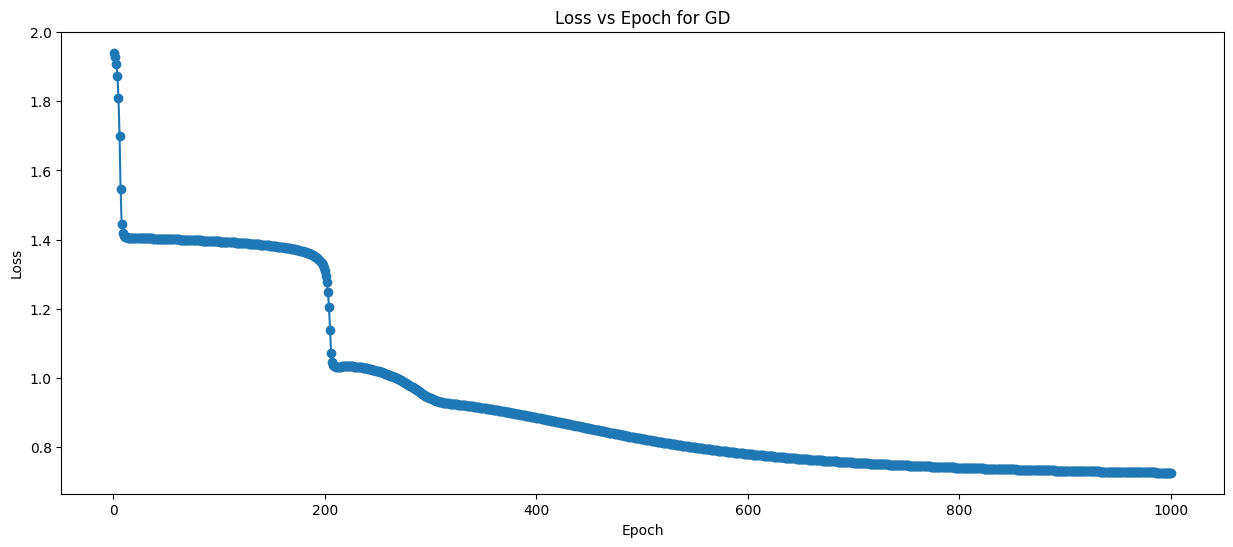

In [61]:
model.fit(X_sg,Y_sg,0.25,1000)

In [62]:
momentum_model = Sigmoid_Neuron_Updated(X_sg,loss,'Momentum_GD')

Initialization has been completed.


Invoking momentum gradient descent flow.


Epochs:   0%|          | 0/1000 [00:00<?, ?Epoch/s]

Plotting Loss vs Epoch for Momentum_GD


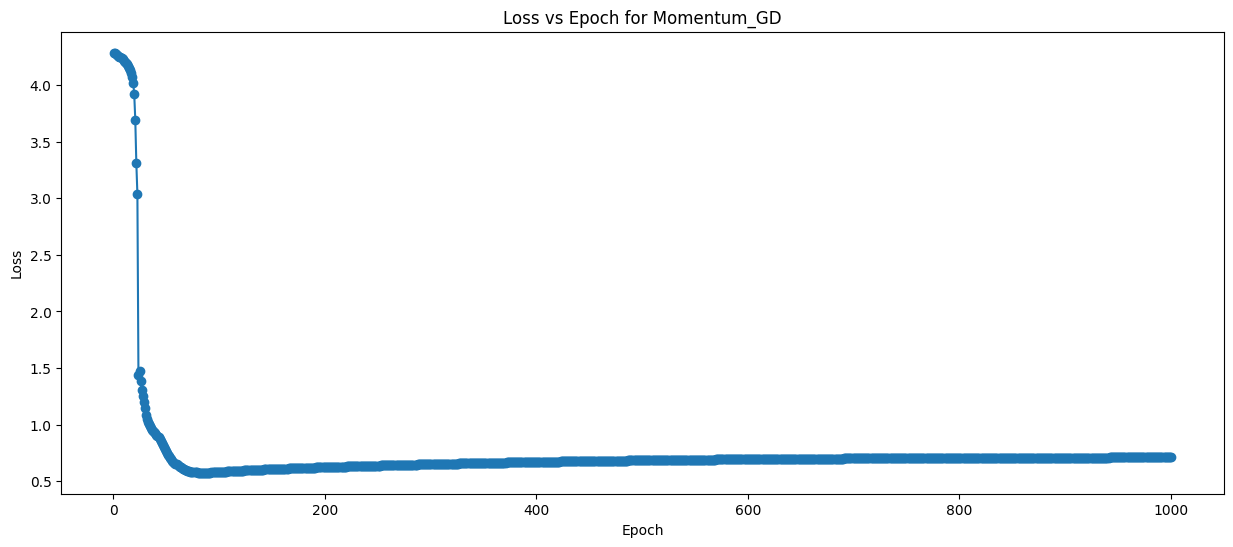

In [63]:
momentum_model.fit(X_sg,Y_sg,0.25,1000)

In [36]:
# For non-linear data
X,Y = datasets.make_blobs(n_samples=100000,n_features=10,centers=2)

Converting the first and second features into sparse data

In [37]:
X[:90000,0] = 0
X[90001:,0] = 1

X[:90000,1] = 0
X[90001:,1] = 1

In [38]:
np.random.shuffle(X[0])
np.random.shuffle(X[1])